<a href="https://colab.research.google.com/github/sinaebrahimi/ml-7072cem/blob/master/Classifying%20Network%20Slices%20Based%20on%20User%20Requirements/prediction-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# df_train_cleaned = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_cleaned.csv')


# df_test_cleaned = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/test_cleaned.csv')


df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_dataset.csv')
df.head(n=5)



,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


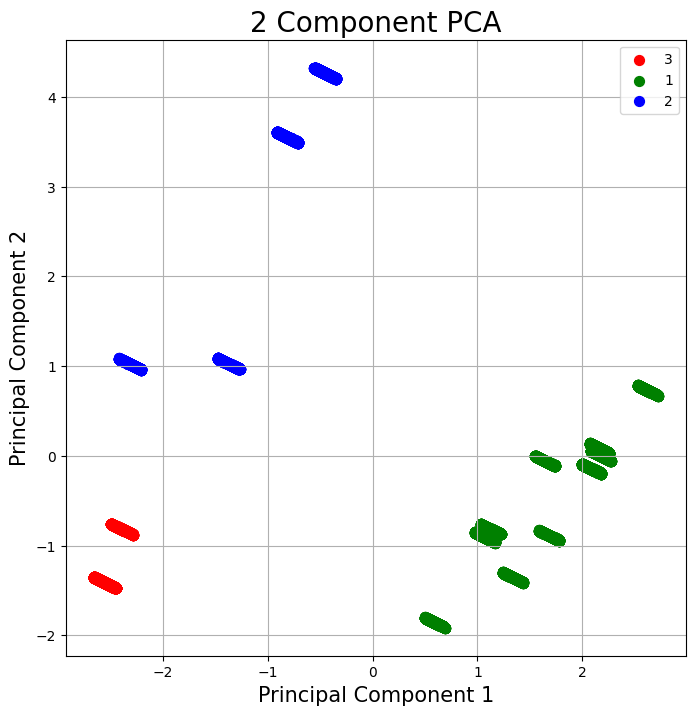

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Standardize the features to have mean=0 and variance=1
features = df.columns[:-1]  # Exclude the target variable
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Change the number of components you want to keep
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate the target variable
df_pca = pd.concat([df_pca, df[['slice Type']]], axis=1)

#####################
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = df['slice Type'].unique()
colors = ['r', 'g', 'b']  # Add more colors if you have more than 3 classes

for target, color in zip(targets, colors):
    indicesToKeep = df_pca['slice Type'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1'], df_pca.loc[indicesToKeep, 'PC2'], c=color, s=50)

ax.legend(targets)
ax.grid()
plt.show()


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import sklearn.tree as tr
#from sklearn.decomposition import PCA

X = df_pca[['PC1', 'PC2']]  # Features
y = df_pca['slice Type']  # Target variable

X_train, xx_test, y_train, yy_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(xx_test, yy_test, test_size=0.5, random_state=42) # 25% of data validation, 25% test, 50 % train

print(X_valid.shape)

(7896, 2)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8433
           2       1.00      1.00      1.00      3647
           3       1.00      1.00      1.00      3712

    accuracy                           1.00     15792
   macro avg       1.00      1.00      1.00     15792
weighted avg       1.00      1.00      1.00     15792



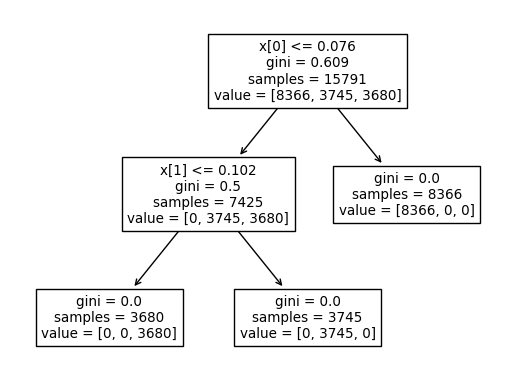

In [ ]:
DT = DecisionTreeClassifier(max_depth=2)

model = DT.fit(X_train, y_train)


# To Visualize Decision Tree
tr.plot_tree(model)

y_pred = model.predict(xx_test)

print(classification_report(yy_test, y_pred))


----------------
Training and predicting with Random Forest...
Random Forest saved as Random Forest_classifier.pkl
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4195
           2       1.00      1.00      1.00      1855
           3       1.00      1.00      1.00      1846

    accuracy                           1.00      7896
   macro avg       1.00      1.00      1.00      7896
weighted avg       1.00      1.00      1.00      7896


----------------
Training and predicting with SVM...
SVM saved as SVM_classifier.pkl
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4195
           2       1.00      1.00      1.00      1855
           3       1.00      1.00      1.00      1846

    accuracy                           1.00      7896
   macro avg       1.00      1.00      1.00      7896
weighted avg       1.00      1.00      1.00      7896


----------------
Training and predi

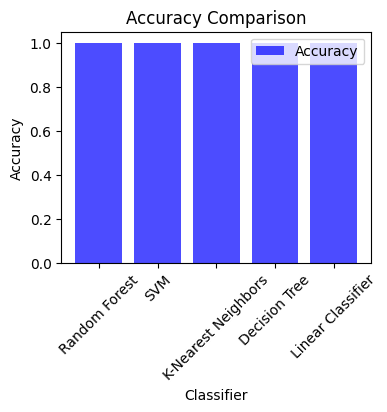

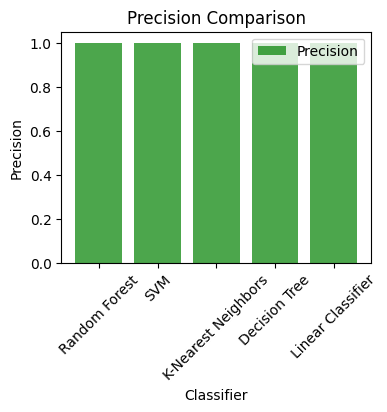

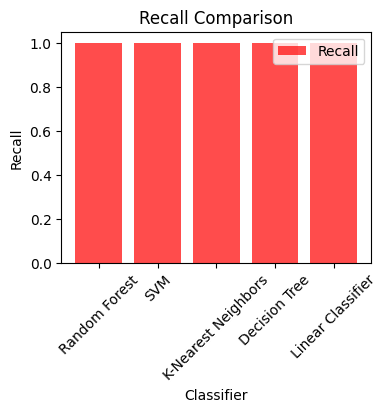

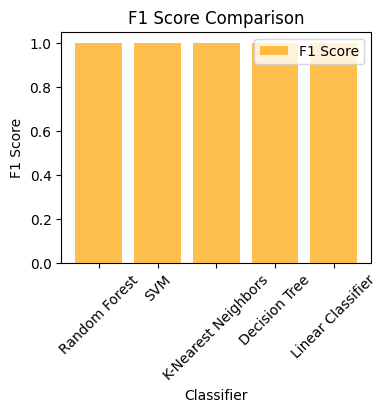

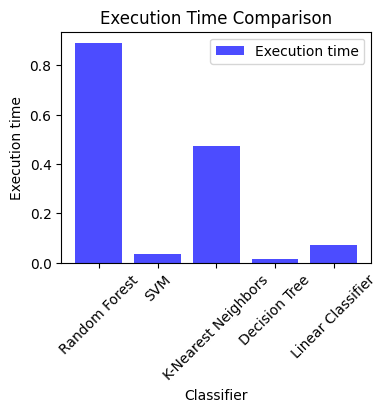

In [ ]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(), #max_depth=3
    'Linear Classifier': LogisticRegression()
}

# Create dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
exec_times = {}

# Initialize a dictionary to store trained classifiers
trained_classifiers = {}

# Train classifiers on the training data and evaluate their performance on the test data
for name, classifier in classifiers.items():
    print(f"\n----------------\nTraining and predicting with {name}...")
    start_time = time.time()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    end_time = time.time()
    exec_times[name] = end_time - start_time
    accuracy_scores[name] = accuracy_score(y_valid, y_pred)
    precision_scores[name] = precision_score(y_valid, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_valid, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_valid, y_pred, average='weighted')

    ###
    # Save the trained classifier to a file
    filename = f'{name}_classifier.pkl'
    file_path = f'/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/' + filename
    joblib.dump(classifier, file_path)
    print(f"{name} saved as {filename}")
    print(classification_report(y_valid, y_pred))

    # Store the trained classifier in the dictionary
    trained_classifiers[name] = classifier

# Plot evaluation metrics for each classifier
plt.figure(figsize=(4, 3))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue', alpha=0.7, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###############################
plt.figure(figsize=(4, 3))
plt.bar(precision_scores.keys(), precision_scores.values(), color='green', alpha=0.7, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(recall_scores.keys(), recall_scores.values(), color='red', alpha=0.7, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(f1_scores.keys(), f1_scores.values(), color='orange', alpha=0.7, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#################################
plt.figure(figsize=(4, 3))
plt.bar(exec_times.keys(), exec_times.values(), color='blue', alpha=0.7, label='Execution time')
plt.xlabel('Classifier')
plt.ylabel('Execution time')
plt.title('Execution Time Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


----------------
Training and predicting with Random Forest...

----------------
Training and predicting with SVM...

----------------
Training and predicting with K-Nearest Neighbors...

----------------
Training and predicting with Decision Tree...

----------------
Training and predicting with Linear Classifier...


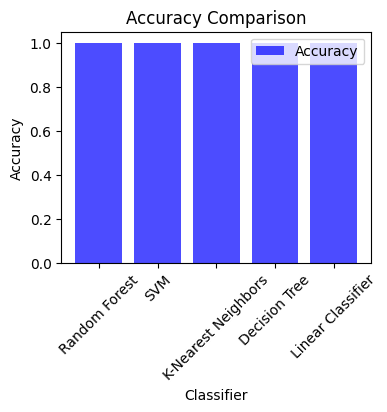

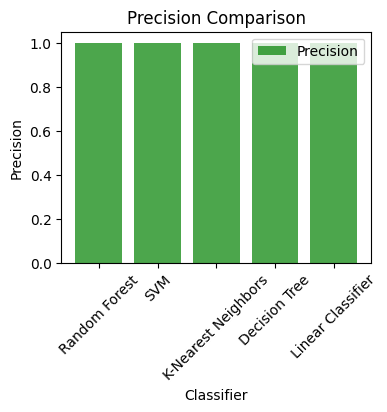

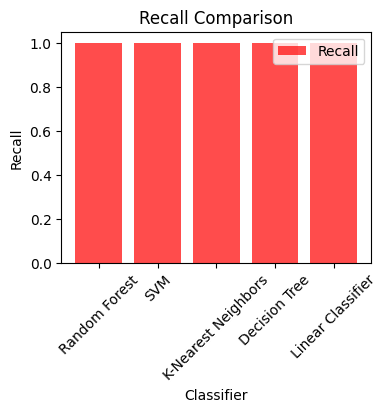

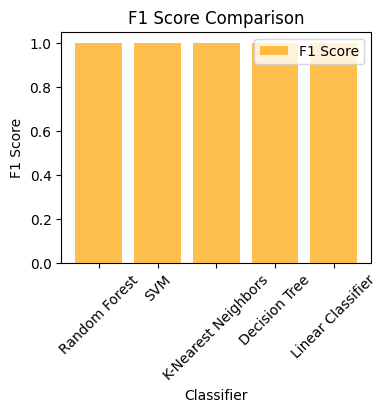

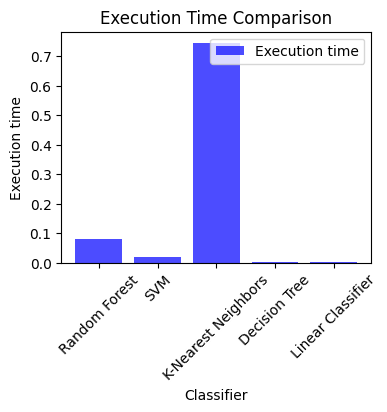

In [ ]:
# Initialize classifiers
# classifiers = {
#     'Random Forest': RandomForestClassifier(),
#     'SVM': SVC(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier()
# }

# Create dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
exec_times = {}

# Initialize a dictionary to store trained classifiers
#trained_classifiers = {}

# Train classifiers on the training data and evaluate their performance on the test data
for name, classifier in classifiers.items():
    print(f"\n----------------\nTraining and predicting with {name}...")
    start_time = time.time()
    #classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    exec_times[name] = end_time - start_time
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    ###
    # Save the trained classifier to a file
    #filename = f'{name}_classifier.pkl'
    #file_path = f'/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/' + filename
    #joblib.dump(classifier, file_path)
    #print(f"{name} saved as {filename}")

    # Store the trained classifier in the dictionary
    #trained_classifiers[name] = classifier

# Plot evaluation metrics for each classifier
plt.figure(figsize=(4, 3))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue', alpha=0.7, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###############################
plt.figure(figsize=(4, 3))
plt.bar(precision_scores.keys(), precision_scores.values(), color='green', alpha=0.7, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(recall_scores.keys(), recall_scores.values(), color='red', alpha=0.7, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(f1_scores.keys(), f1_scores.values(), color='orange', alpha=0.7, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#################################
plt.figure(figsize=(4, 3))
plt.bar(exec_times.keys(), exec_times.values(), color='blue', alpha=0.7, label='Execution time')
plt.xlabel('Classifier')
plt.ylabel('Execution time')
plt.title('Execution Time Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import sklearn.tree as tr
from sklearn.decomposition import PCA

# Drop the categorical variables from the dataframe
numerical = df.drop(['slice Type', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone'], axis=1)

# Standardize the numerical variables
standardized = (numerical - numerical.mean()) / numerical.std()

# Perform PCA with two components
pca = PCA(n_components=2)
components = pca.fit_transform(standardized)

# Create a scatterplot of the two principal components
plt.scatter(components[:, 0], components[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
# Load the train dataset



# Split the train dataset into features and target variable
# X = df_train_cleaned.drop(columns=['Packet delay','IoT','LTE/5G','Industry 4.0','Smartphone','slice Type'])
#X = df_train_cleaned.drop(columns=['slice Type'])

#y = df_train_cleaned['slice Type']

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X)

# Split the dataset into 70% training data and 30% test data
X_train, xx_test, y_train, yy_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(xx_test, yy_test, test_size=0.5, random_state=42) # 25% of data validation, 25% test, 50 % train

print(yy_test.shape)

(12634,)


In [ ]:
# Load the trained classifiers
trained_classifiers = {}
for name in classifiers.keys():
    filename = f'/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/{name}_classifier.pkl'
    trained_classifiers[name] = joblib.load(filename)
    print(f"Loaded {name} from {filename}")

X_test = df_test_cleaned
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test dataset using each classifier
predictions = {}
exec_times = {}

for name, classifier in trained_classifiers.items():
    print(f"Predicting with {name}...")
    start_time = time.time()
    y_pred = classifier.predict(X_test_scaled)
    predictions[name] = y_pred
    end_time = time.time()
    exec_times[name] = end_time - start_time

# Evaluate predictions (qualitatively)
for name, y_pred in predictions.items():
    print(f"Predictions using {name}:")
    print(pd.Series(y_pred).value_counts())
    print("\n")
    print(f"Execution time:")
    print(exec_times[name])
    print("\n------------")



Loaded Random Forest from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/Random Forest_classifier.pkl
Loaded SVM from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/SVM_classifier.pkl
Loaded K-Nearest Neighbors from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/K-Nearest Neighbors_classifier.pkl
Loaded Decision Tree from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/Decision Tree_classifier.pkl
Predicting with Random Forest...
Predicting with SVM...
Predicting with K-Nearest Neighbors...
Predicting with Decision Tree...
Predictions using Random Forest:
1    16800
3     7392
2     7392
dtype: int64


Execution time:
0.26735925674438477

------------
Predictions using SVM:
1    16800
3     7392
2     7392
dtype: int64


Execution time:
0.07575297355651855

------------
Predictions using K-Nearest Neighbors:
1    16800
3     7392
2     7392
dtype: i

In [ ]:
print(exec_times)

{'Random Forest': 0.4269428253173828, 'SVM': 0.08047771453857422, 'K-Nearest Neighbors': 17.536547899246216, 'Decision Tree': 0.0023450851440429688}
